In [18]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

A || 12 months of sales data merged into one file.

In [19]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
df.head()
#os.listdir() will get you everything that's in a directory - files and directories
#if you want just the files you could filter down using os.path
#os.walk() yields two lists for each directory it visits, splitting into files and directories
compiled_data = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data/')]
for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    compiled_data = pd.concat([compiled_data,df])

compiled_data.head()
compiled_data.to_csv('Annual_Sales.csv',index=False)

Cleaning up the data 

In [20]:
#drop the rows with NaNs 
#select the rows with NaNs
nan_df = compiled_data[compiled_data.isna().any(axis=1)]
filtered_data = compiled_data.dropna(how='all')


In [21]:
filtered_data = filtered_data[filtered_data['Order Date'].str[0:2] != 'Or']
filtered_data['Month'] = filtered_data['Order Date'].str[0:2]
filtered_data['Month'] = filtered_data['Month'].astype('int32')
filtered_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Important Business Questions
1. What was the best month for sales ? 
2. How much was earned in that month
3. Which city had the highest sales ?
4. What time should we display ads to maximize the likelihood of customers buying products ? 
5. What products are most often sold together ?
6. Which product generated maximum revenue ?

In [22]:
filtered_data['Sales'] = filtered_data['Quantity Ordered'].astype('float16') * filtered_data['Price Each'].astype('float16')
sales_sum = filtered_data.groupby('Month').sum()
sales_sum
#sales_sum is also a mini dataframe

C:\Users\Aniket\AppData\Local\Temp\ipykernel_15776\1921611724.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_sum = filtered_data.groupby('Month').sum()


,Sales
Month,
1,1822288.25
2,2202062.00
3,2807150.75
4,3390729.25
5,3152660.50
6,2577846.75
7,2647823.00
8,2244507.00
9,2097598.50


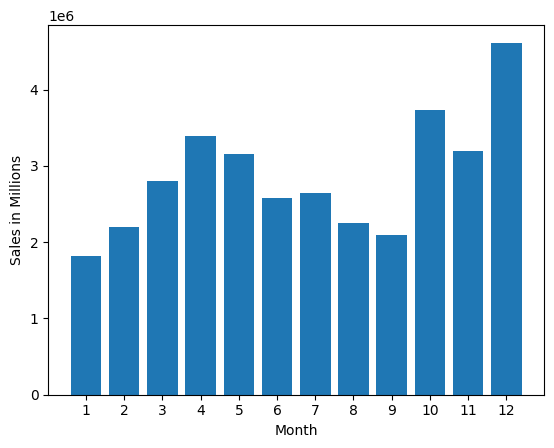

In [23]:
months = range(1,13)
plt.bar(months,sales_sum['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Millions')
plt.xlabel('Month')
plt.show()

Answers 
1. December had the best sales. 
2. December had the best sales of about 4.6 million USD

In [24]:
#to answer three we need to get the city name from the address column
#we need to split the column by setting the delimiter as ','
filtered_data[['Street','City','Pincode']] = filtered_data['Purchase Address'].str.split(',',expand=True)
sales_sum = filtered_data.groupby('City').sum()
sales_sum

C:\Users\Aniket\AppData\Local\Temp\ipykernel_15776\64707403.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_sum = filtered_data.groupby('City').sum()


,Month,Sales
City,,
Atlanta,104794,2795547.25
Austin,69829,1819613.75
Boston,141112,3661706.75
Dallas,104620,2768024.00
Los Angeles,208325,5452667.50
New York City,175741,4664400.00
Portland,87765,2320531.25
San Francisco,315520,8262350.50
Seattle,104941,2747804.00


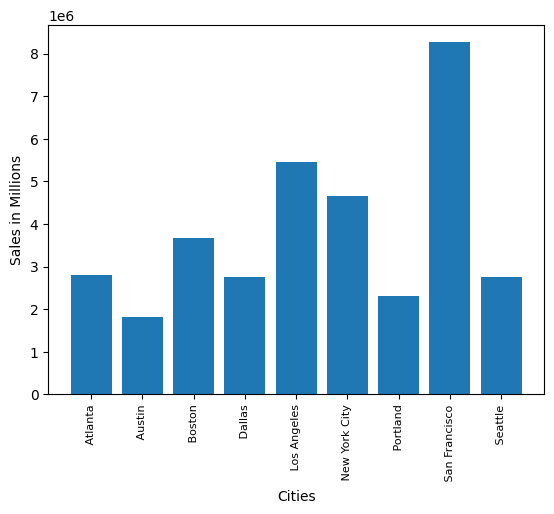

In [25]:
cities = [city for city, df in filtered_data.groupby('City')]
# cities = filtered_data['City'].unique()
# if we write our cities like the commented block of code then x-axis and y-axis elements
# are not going to be in the same order. 
plt.bar(cities,sales_sum['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in Millions')
plt.xlabel('Cities')
plt.show()


In [26]:
filtered_data['Order Date'] = pd.to_datetime(filtered_data['Order Date'])
filtered_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Pincode
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.906250,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100.000000,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.992188,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.992188,333 8th St,Los Angeles,CA 90001


In [27]:
filtered_data['Hour'] = filtered_data['Order Date'].dt.hour
filtered_data['Minute'] = filtered_data['Order Date'].dt.minute
filtered_data = filtered_data.drop(columns=['Street', 'Pincode'])
filtered_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.906250,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100.000000,Boston,22,30
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.992188,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.992188,Los Angeles,9,27


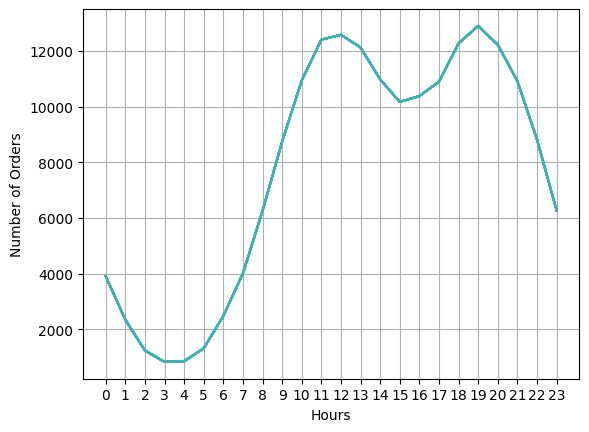

In [28]:
hours = [hour for hour, df in filtered_data.groupby('Hour')]
plt.plot(hours,filtered_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

4. The number of orders placed goes up at 12pm and 7pm. So I think placing the advertisements 
    slightly before these hours can help maximising the likelihood of Sales.

In [29]:
#if products have the same orderId then that means they are being sold together 
#they are sold in one particular order
prefinaldf = filtered_data[filtered_data['Order Date'].duplicated(keep=False)]
prefinaldf['Grouped Products'] = prefinaldf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
prefinaldf.head()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_15776\2286028957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prefinaldf['Grouped Products'] = prefinaldf.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped Products
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.906250,Dallas,8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,100.000000,Boston,22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.992188,Los Angeles,14,38,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.992188,Los Angeles,9,27,Wired Headphones


In [30]:
prefinaldf = prefinaldf[['Order ID','Grouped Products']].drop_duplicates()
prefinaldf.head()

,Order ID,Grouped Products
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable


In [31]:
count = Counter()
for row in prefinaldf['Grouped Products']:
    rows = row.split(',')
    count.update(Counter(combinations(rows,2)))
    #2 is the count of items sold together
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


5. So these are the items that are sold together 

C:\Users\Aniket\AppData\Local\Temp\ipykernel_15776\2472273725.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revenue = productagg.sum()['Sales']


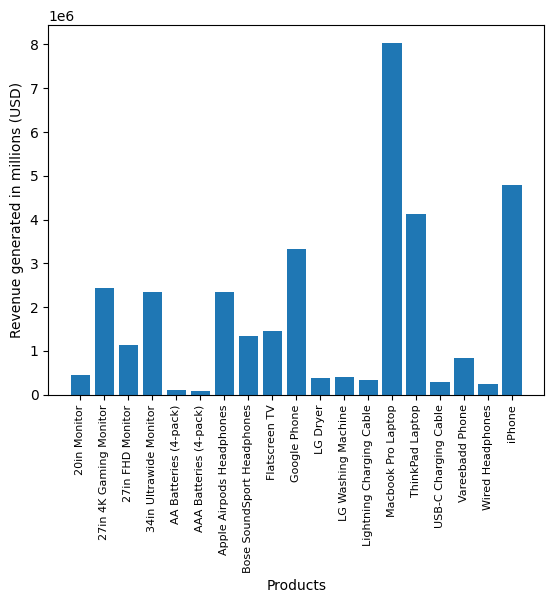

In [43]:
productagg = filtered_data.groupby('Product')
revenue = productagg.sum()['Sales']
products = [product for product, df in productagg]
plt.bar(products,revenue)
plt.xticks(products, rotation='vertical',size=8)
plt.xlabel('Products')
plt.ylabel('Revenue generated in millions (USD)')
plt.show()


To answer 6th question, Macbook Pro Laptop generated the maximum revenue.